#  Area Under the Curve

You are going to use Python to calculate probabilities associated with a Gaussian distribution. In other words, you'll learn to calculate the area under the probability density function.

# SciPy Library

Python has a library called [SciPy](https://www.scipy.org/scipylib/index.html), which is used for running scientific and mathematical computations. You are specifically going to use a part of the library that implements Gaussian distributions.

# Demo: Probability Density Function

The code cell below calculates a Gaussian probability density function two ways. First, we're using the density function from the previous exercises. Then, we compare the results using the SciPy library's implementation.

You'll see that the results are exactly the same.

In [3]:
%pip install scipy

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------------ ------------------------- 20.5/60.8 kB 640.0 kB/s eta 0:00:01
     -------------------------------- ----- 51.2/60.8 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 639.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/41.2 MB 4.2 MB/s eta 0:00:10
    --------------------------------------- 0.6/41.2 MB 7.4 MB/s eta 0:00:06
   - -------------------------------------- 1.6/41.2 MB 12.7 MB/s eta 0:00:04
   --- ------------------------------------ 3.4/41.2 MB 19.5 MB/s eta 0:00:02
   ---- ----------------------------------- 4.5/41.2 MB 20.3 MB/s eta 0:00:02
   ------ --------------------------------- 6.8/41.2 MB 27.2 MB/s eta 0:00:02
   -------- ------------------------------- 9.0/41.2 MB 30.2 MB/s eta 0:00:02
   ----------- ---------------------------- 11.9/41.2 MB 46.7 MB/s eta 0:0


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\MSi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
from scipy.stats import norm
import numpy as np

# our solution to calculate the probability density function
def gaussian_density(x, mu, sigma):
    return (1/np.sqrt(2*np.pi*np.power(sigma, 2.))) * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sigma, 2.)))

print("Probability density function our solution: mu = 50, sigma = 10, x = 50")
print(gaussian_density(50, 50, 10))
print("\nProbability density function SciPy: mu = 50, sigma = 10, x = 50")
print(norm(loc = 50, scale = 10).pdf(50))

Probability density function our solution: mu = 50, sigma = 10, x = 50
0.03989422804014327

Probability density function SciPy: mu = 50, sigma = 10, x = 50
0.03989422804014327


You might wonder why the Gaussian distribution is called "norm" in the SciPy library; it's because the Gaussian distribution is also called the normal distribution. 

Also, note that to initialize the distribution, the loc keyword is the mean and the scale keyword is the standard deviation.

# Calculating Probability

The area under the probability density function represents probability. Your job will be to write a function that calculates the probability between two x-values. For example, using the winter San Francisco temperature example, what is the probability that the temperature is between 30 degrees and 50 degrees? 

The SciPy library has a function that calculates the area under the curve for you. It's called cdf ([cumulative density function](https://en.wikipedia.org/wiki/Cumulative_distribution_function)). You can use the cdf SciPy method in a similar way to the pdf method. Run the code cell below to see an example.

In [5]:
norm(loc = 50, scale = 10).cdf(50)

np.float64(0.5)

Why is the output 0.5? The cdf method gives you the area under the curve from x = -infinity through the input, which in this case was 50. The area under the curve is 0.5 meaning there is a 50% chance that the temperature is between -infinity and 50 degrees.

Run the code cell below to see a visualization of the area under the curve from -infinity to 50.

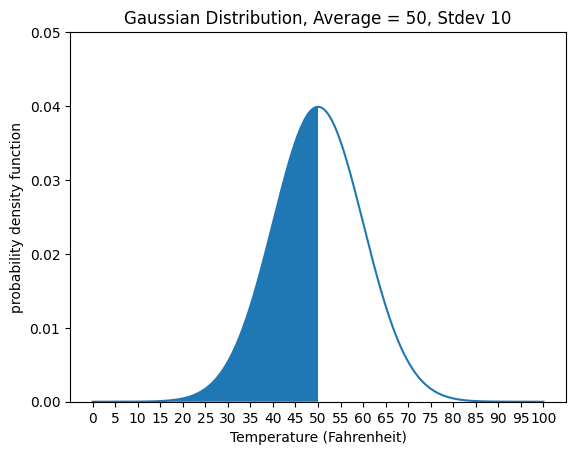

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline  

### 
# The plot_fill function plots a probability density function and also
# shades the area under the curve between x_prob_min and x_prob_max.
# INPUTS:
# x: x-axis values for plotting
# x_prob_min: minimum x-value for shading the visualization
# x_prob_max: maximum x-value for shading the visualization
# y_lim: the highest y-value to show on the y-axis
# title: visualization title
#
# OUTPUTS:
# prints out a visualization
### 

def plot_fill(x, x_prob_min, x_prob_max, y_lim, title):
    # Calculate y values of the probability density function
    # Note that the pdf method can accept an array of values from numpy linspace.
    y = norm(loc = 50, scale = 10).pdf(x)
    
    # Calculate values for filling the area under the curve
    x_fill = np.linspace(x_prob_min, x_prob_max, 1000)
    y_fill = norm(loc = 50, scale = 10).pdf(x_fill)
    
    # Plot the results
    plt.plot(x, y)
    plt.fill_between(x_fill, y_fill)
    plt.title(title)
    plt.ylim(0, y_lim)
    plt.xticks(np.linspace(0, 100, 21))
    plt.xlabel('Temperature (Fahrenheit)')
    plt.ylabel('probability density function')
    plt.show()

average = 50
stdev = 10
y_lim = 0.05
x = np.linspace(0, 100, 1000)

plot_fill(x, 0, 50, y_lim,
          'Gaussian Distribution, Average = ' + str(average) + ', Stdev ' + str(stdev))

# More Examples

Here are a few more examples of the cdf method. The code cell below prints out the probability that the temperature is between:
* -infinity and 25
* -infinity and 75
* -infinity and 125
* -infinity and +infinity

In [7]:
print(norm(loc = 50, scale = 10).cdf(25))
print(norm(loc = 50, scale = 10).cdf(75))
print('%.20f' % norm(loc = 50, scale = 10).cdf(125)) # '%.20f' prints out 20 decimal places
print(norm(loc = 50, scale = 10).cdf(float('inf')))

0.006209665325776132
0.9937903346742238
0.99999999999996813660
1.0


What if you wanted to know the probability of the temperature being between 25 and +infinity? Or 75 and +infinity? 

Well, you know that the area under the curve from -infinity to +infinity is equal to 1. And the cdf function can return the probability from -infinity to 25. 

So if you wanted to know the probability from 25 to +infinity, you could do the following calculation:

In [8]:
print(1 - norm(loc = 50, scale = 10).cdf(25))

0.9937903346742238


Notice that for this particular Gaussian distribution, the probability that temperature is between -infinity and 75 is the same as the probability from 25 to +infinity. This is due to the symmetry of the Gaussian distribution: 25 and 75 are both 25 away from the mean of 50.

# Exercise

What if you wanted to know the probability that the temperature is between 25 and 75? Based on what you've seen so far, you have all the information you need to write a function that does this calculation. 

Run the code cell below to get a hint for how to do this. The code cell outputs visualizations for the area under the curve from -infinity to 25, then -infinity to 75, and finally between 25 and 75. 

Remember that the cdf method calculates area under the curve from -infinity up to the number you specify. How can you use this information to calculate the probability **between** 25 and 75? Remember that the probability between 25 and 75 is equal to the area under the curve between 25 and 75.

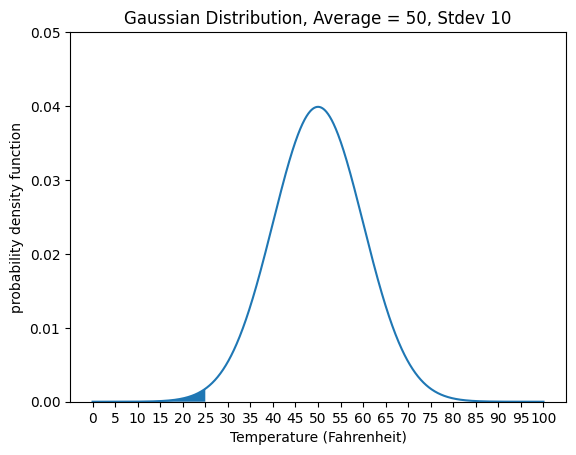

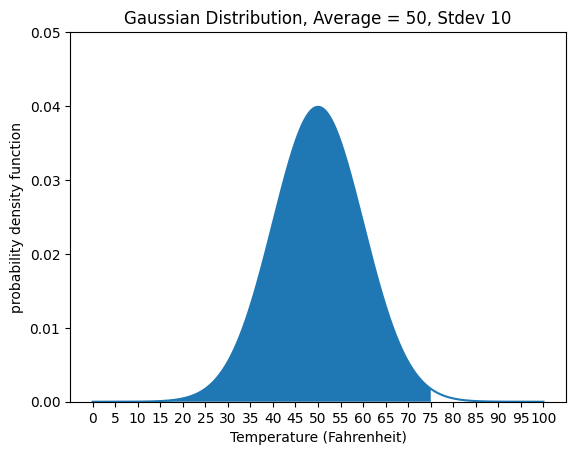

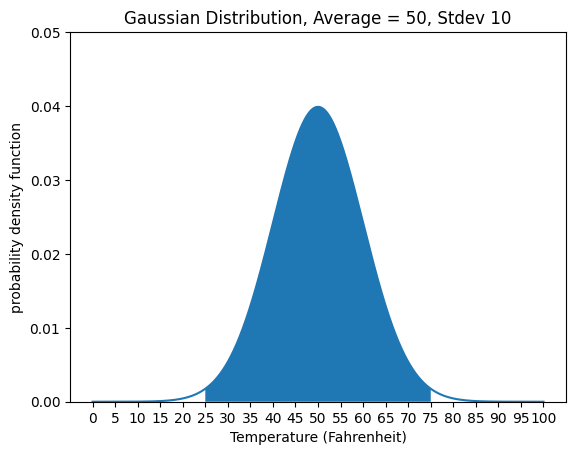

In [9]:
average = 50
stdev = 10
y_lim = 0.05
x = np.linspace(0, 100, 1000)

plot_fill(x, 0, 25, y_lim,
          'Gaussian Distribution, Average = ' + str(average) + ', Stdev ' + str(stdev))

plot_fill(x, 0, 75, y_lim,
          'Gaussian Distribution, Average = ' + str(average) + ', Stdev ' + str(stdev))

plot_fill(x, 25, 75, y_lim,
          'Gaussian Distribution, Average = ' + str(average) + ', Stdev ' + str(stdev))

Fill in your code below. The function has four inputs and one output. Here are the inputs:

**Inputs**
* mean - Gaussian distribution mean
* stdev - Gaussian distribution standard deviation
* x_low - low end of the probability range
* x_high - high end of the probability range

**Output**
* probability that the x value is between x_low and x_high

We've provided a solution in the next node of the lesson title "Calculating Area Under the Curve in Python [Solution]".

In [ ]:
def gaussian_probability(mean, stdev, x_low, x_high):
    # TODO: return the Gaussian distribution probability
    # that the x-value is between x_low and x_high
    
    # Use the SciPy library norm.cdf method
    return norm(loc = mean)

Run the code cell below to test your results. A solution is provided in the next part of the lesson.

In [ ]:
assert float('{0:.8f}'.format(gaussian_probability(50, 10, 25, 75))) == 0.98758067
assert float('{0:.2f}'.format(gaussian_probability(50, 10, float('-inf'), float('inf')))) == 1.0
assert float('{0:.8f}'.format(gaussian_probability(50, 10, 20, 60))) == 0.83999485
print('All tests passed')